# COM S 474/574 Fall 2024
# 3.1 Linear Regression
## Bowen Weng (bweng@iastate.edu)

### - The Real Estate Dataset

- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# read and print the data set
real_estate_data = pd.read_csv("data/Real_estate.csv")
print (real_estate_data)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

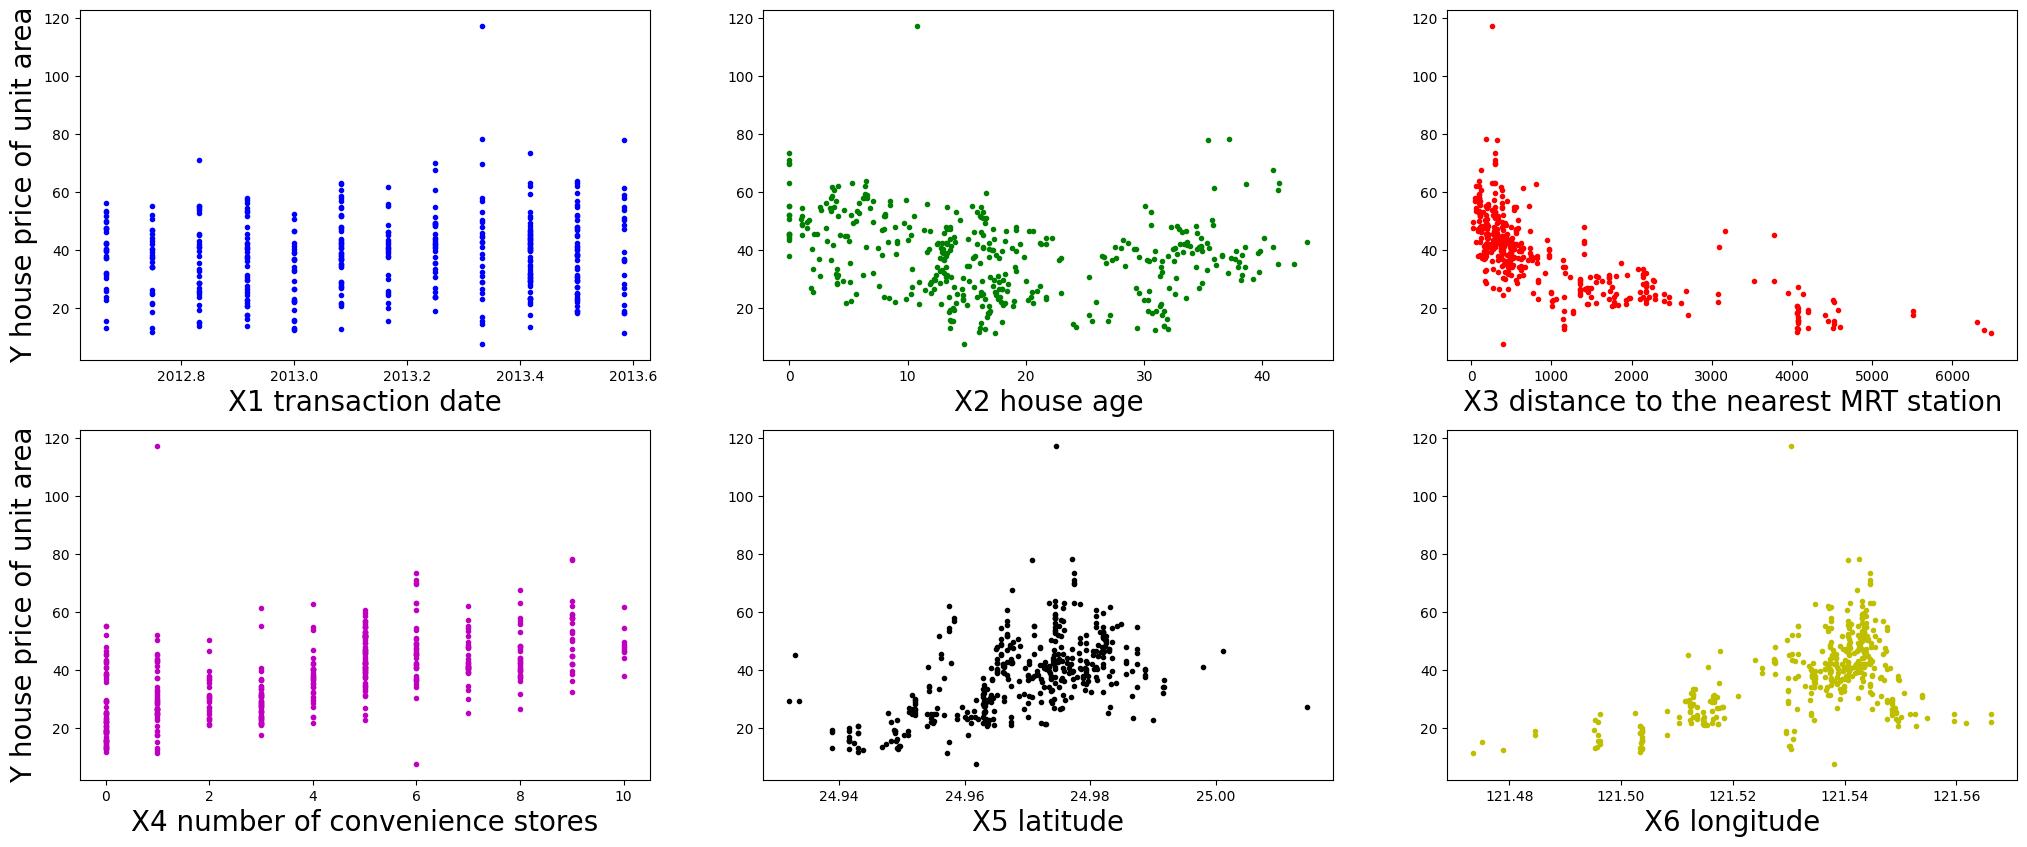

In [11]:
fig, axs = plt.subplots(2,3, figsize=(25,10))
ft_size = 20
axs[0][0].plot(real_estate_data["X1 transaction date"], real_estate_data["Y house price of unit area"], "b.")
axs[0][0].set_xlabel("X1 transaction date",fontsize=ft_size)
axs[0][1].plot(real_estate_data["X2 house age"], real_estate_data["Y house price of unit area"], "g.")
axs[0][1].set_xlabel("X2 house age",fontsize=ft_size)
axs[0][2].plot(real_estate_data["X3 distance to the nearest MRT station"], real_estate_data["Y house price of unit area"], "r.")
axs[0][2].set_xlabel("X3 distance to the nearest MRT station",fontsize=ft_size)
axs[1][0].plot(real_estate_data["X4 number of convenience stores"], real_estate_data["Y house price of unit area"], "m.")
axs[1][0].set_xlabel("X4 number of convenience stores",fontsize=ft_size)
axs[1][1].plot(real_estate_data["X5 latitude"], real_estate_data["Y house price of unit area"], "k.")
axs[1][1].set_xlabel("X5 latitude",fontsize=ft_size)
axs[1][2].plot(real_estate_data["X6 longitude"], real_estate_data["Y house price of unit area"], "y.")
axs[1][2].set_xlabel("X6 longitude",fontsize=ft_size)
for i in range(2):
    axs[i][0].set_ylabel("Y house price of unit area",fontsize=ft_size)

Text(0.5, 0, 'Y house price of unit area')

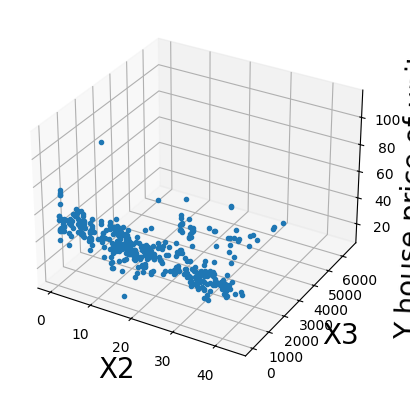

In [12]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(real_estate_data["X2 house age"], 
        real_estate_data["X3 distance to the nearest MRT station"], 
        real_estate_data["Y house price of unit area"], ".")
ax.set_xlabel("X2", fontsize=ft_size)
ax.set_ylabel("X3", fontsize=ft_size)
ax.set_zlabel("Y house price of unit area", fontsize=ft_size)

### Single-variable Linear Model

- There can be many machine learning techniques & topics studied with this data set
- Let's focus on **house price prediction** for this lecture
- Consider the single variable case as a start point

A single-variable linear function takes the form as
$$
  y = ax + b
$$


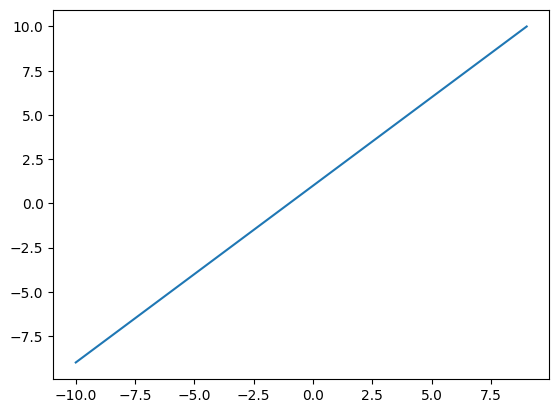

In [13]:
a = 1
b = 1
xs = np.arange(-10,10)
ys = a * xs + b
plt.plot(xs, ys, "-")

If represented as a general parameterized function
$$
  y = f(x; \theta)
$$
- what is $y$?
    - the house price in this example
    - $y$ is the variable we are trying to predict
    - many names: target, regressant, label, dependent variable, etc.
- what is $x$?
    - can be house age for example (single-variable)
    - $x$ is the varaible we are using for prediction
    - many names: feature, regressor, attribute, independent variable, etc.
- what is $\theta$?
    - $\theta = [a, b]^T$
    - $a$: slope
    - $b$: intercept
    - many names: paramters, weights
- what is the data (or data set)?
    - a set of pairs $\mathcal{D} = \{(x_i, y_i)\}_{i=1,\dots,n}$

How to solve it?

$$
    a = \frac{s_{xy}}{s_{xx}}, b = \bar{y} - a\bar{x}
$$

| Meaning           | Notion   | Python |
| :------------------ | :-------:| :-: |
| Sample mean         | $$\bar{x}=\frac{1}{n}\sum_{1}^n x_i$$                    | xm |
| Sample variance     | $$s_{xx}=\frac{1}{n}\sum_{1}^n (x_i-\bar{x})^2$$           | sxx |
| Sample standard deviation | $$s_{x} = \sqrt{s_{xx}}$$ | sx |
| Sample covariance | $$s_{xy} = \frac{1}{n}\sum_{1}^n (x_i-\bar{x})(y_i-\bar{y})$$ | sxy |
| Sample correlation coefficient | $$\rho_{xy} = \frac{s_{xy}}{s_xs_y}$$ | rhoxy |


In [14]:
def single_variable_linear_regression(xs, ys):
    xm = np.mean(xs)
    ym = np.mean(ys)
    sxy = np.mean((xs-xm)*(ys-ym))
    sxx = np.mean((xs-xm)**2)
    a = sxy/sxx
    b = ym - a * xm
    plt.plot(xs, ys, ".")
    plt.plot([min(xs), max(xs)], [a*min(xs)+b,a*max(xs)+b],"-")

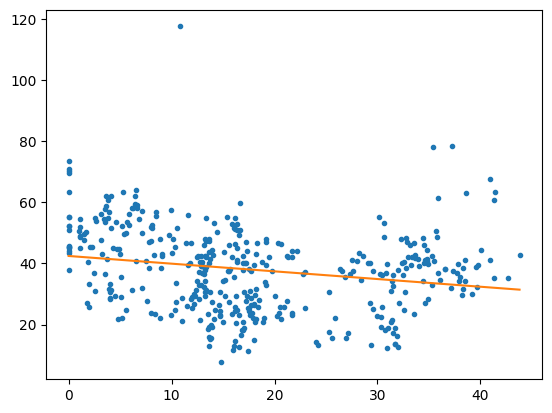

In [15]:
xs = real_estate_data["X2 house age"]
ys = real_estate_data["Y house price of unit area"]
single_variable_linear_regression(xs,ys)

In [16]:
from sklearn import linear_model
def single_variable_linear_regression2(xs, ys):
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(xs.reshape(-1,1), ys)
    plt.plot(xs, ys, ".")
    plt.plot(np.sort(xs), model.predict(np.sort(xs).reshape(-1,1)),"-")

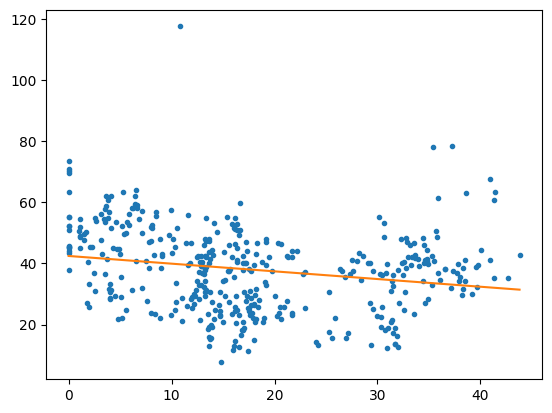

In [17]:
xs = real_estate_data["X2 house age"].to_numpy()
ys = real_estate_data["Y house price of unit area"].to_numpy()
single_variable_linear_regression2(xs,ys)

HW2 code - Section 2 problem 2

In [23]:
import numpy as np
import pandas as pd

class GradientDescent:
    def __init__(self, learning_rate=0.001, num_iterations=4140,
                    w=np.ones(6), b=10.0):
        self.data=data
        self.learning_rate=learning_rate
        self.num_iterations=num_iterations
        self.w = w
        self.b = b

    def printWeights(self):
        print("Updated weights (omega):", self.w)
        print("Updated weights (b):", self.b)
    
    def fit(self, X, y):
        n = len(y)
        for i in range(self.num_iterations):
            y_pred = np.dot(X, self.w) + self.b
            error = y - y_pred
            w_gradient = (2 / n) * np.dot(X.T, error) 
            b_gradient = (2 / n) * np.sum(error)
            self.b = self.b + (self.learning_rate * b_gradient)
            self.w = self.w + (self.learning_rate * w_gradient)

data = pd.read_csv('data/Real_estate.csv')
X = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
           'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values
y = data['Y house price of unit area'].values

means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
X_normalized = (X - means) / stds

gd = GradientDescent()
gd.fit(X_normalized, y)
gd.printWeights()

Updated weights (omega): [ 1.39407341 -3.08260342 -4.49279881  3.5603507   3.07293574  0.66083718]
Updated weights (b): 37.97315779063096


In [26]:
# section 2-Q2c
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

X_normalized = (X - means) / stds

omega = np.ones(6)
b = 10
gamma = 0.001
n_samples = X_normalized.shape[0]
n_epochs = 10

for epoch in range(n_epochs):
    for i in range(n_samples):
        y_hat = np.dot(omega, X_normalized[i]) + b
    
        error = y[i] - y_hat
        
        omega += gamma * error * X_normalized[i]
        b += gamma * error

print("Updated omega (SGD):", omega)
print("Updated b (SGD):", b)

Updated omega (SGD): [ 1.33857174 -2.9581394  -3.50707783  3.68417233  3.2574367   1.50002097]
Updated b (SGD): 37.49771535408437


In [27]:
# compare 2a and 2b solutions (Q2c)\
def predict(X, w, b):
    return np.dot(X, w) + b

def compute_rss(X, y, w, b):
    # Make predictions
    y_pred = predict(X, w, b)
    
    # Calculate RSS
    rss = np.sum((y - y_pred) ** 2)
    return rss

In [29]:
print("2a solution RSS:", compute_rss(X, y, gd.w, gd.b))
print("Stochastic Gradient Descent RSS:", compute_rss(X, y, omega, b))

2a solution RSS: 14838860541.043459
Stochastic Gradient Descent RSS: 8406764250.563485
